In [1]:
# Latent Semantic Analysis using Python

# Importing the Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import nltk
import pandas as pd
import numpy as np

In [2]:
# Sample Data
dataset = ["""The amount of polution is increasing day by day. Climate change is 
a pressing issue that demands immediate action. We have launch campaigns to stop 
pollution and global warming. The consequences of climate change are becoming increasingly evident with rising temperatures and extreme weather events.
Renewable energy sources such as solar and wind power are crucial for reducing greenhouse gas emissions.
Efforts to reduce plastic waste and promote recycling are essential in combating environmental pollution.
Conserving water through efficient usage and responsible practices is vital for sustainable living.
Educating communities about the importance of biodiversity preservation can help protect fragile ecosystems.""",

"""The concert was just great. Everyone was dancing and having a great time 
 at the party.  All of us were singing in the concert. The birthday party was a blast, with lively music, delicious food, and joyful laughter.
We danced the night away at the lively club party, surrounded by friends and great music.
The surprise party was a huge success, leaving the guest of honor speechless and filled with joy.
The costume party was a creative extravaganza, with attendees dressed up as their favorite fictional characters.
We gathered around a bonfire at the beach party, enjoying s'mores and the sound of crashing waves.
The housewarming party brought together neighbors and friends to celebrate the new home and create lasting memories.""",

"""I love to see Gordon Ramsay cook. I enjoy experimenting with new recipes and flavors 
 in the kitchen. Baking bread from scratch is a therapeutic and rewarding experience.
I love the aroma of freshly brewed coffee in the morning. Cooking with fresh, locally
 sourced ingredients enhances the flavor of the dishes Trying out different cuisines 
 allows me to explore diverse culinary traditions""",

"""Google is introducing a new technology. I am fascinated by the advancements in
virtual reality technology. AI Robots are examples of great technology present today. Artificial intelligence is revolutionizing various industries, including healthcare and finance.
The latest smartphone models boast impressive camera capabilities and fast processing speeds.
Blockchain technology has the potential to revolutionize secure transactions and data management.
Virtual reality technology provides immersive experiences and opportunities for virtual travel.
Smart home devices allow for convenient automation and control of household appliances""",
          
"""We had a blast at the lively birthday party last night.
The dance floor was packed, and everyone was having a great time at the party.
The host went above and beyond to create a festive atmosphere with colorful decorations and upbeat music.
The party featured a delicious spread of food and refreshing beverages.
Guests mingled and enjoyed engaging conversations throughout the evening.
The party had a fun theme, and everyone came dressed up in creative costumes.
There was a fantastic live band playing energetic music that kept everyone dancing.
Party games and activities added an extra element of excitement and entertainment.
The party favors were a thoughtful gesture and a great way to commemorate the occasion.
As the night went on, laughter and cheer filled the air, making it a memorable celebration."""]

dataset = [line.lower() for line in dataset]

In [3]:
dataset

['the amount of polution is increasing day by day. climate change is \na pressing issue that demands immediate action. we have launch campaigns to stop \npollution and global warming. the consequences of climate change are becoming increasingly evident with rising temperatures and extreme weather events.\nrenewable energy sources such as solar and wind power are crucial for reducing greenhouse gas emissions.\nefforts to reduce plastic waste and promote recycling are essential in combating environmental pollution.\nconserving water through efficient usage and responsible practices is vital for sustainable living.\neducating communities about the importance of biodiversity preservation can help protect fragile ecosystems.',
 "the concert was just great. everyone was dancing and having a great time \n at the party.  all of us were singing in the concert. the birthday party was a blast, with lively music, delicious food, and joyful laughter.\nwe danced the night away at the lively club par

In [4]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [5]:
clean_models = []
for m in dataset:
    stop_m = [i for i in m.split() if i not in stop]
    clean_models.append(stop_m)

print(clean_models)

[['amount', 'polution', 'increasing', 'day', 'day.', 'climate', 'change', 'pressing', 'issue', 'demands', 'immediate', 'action.', 'launch', 'campaigns', 'stop', 'pollution', 'global', 'warming.', 'consequences', 'climate', 'change', 'becoming', 'increasingly', 'evident', 'rising', 'temperatures', 'extreme', 'weather', 'events.', 'renewable', 'energy', 'sources', 'solar', 'wind', 'power', 'crucial', 'reducing', 'greenhouse', 'gas', 'emissions.', 'efforts', 'reduce', 'plastic', 'waste', 'promote', 'recycling', 'essential', 'combating', 'environmental', 'pollution.', 'conserving', 'water', 'efficient', 'usage', 'responsible', 'practices', 'vital', 'sustainable', 'living.', 'educating', 'communities', 'importance', 'biodiversity', 'preservation', 'help', 'protect', 'fragile', 'ecosystems.'], ['concert', 'great.', 'everyone', 'dancing', 'great', 'time', 'party.', 'us', 'singing', 'concert.', 'birthday', 'party', 'blast,', 'lively', 'music,', 'delicious', 'food,', 'joyful', 'laughter.', 'dan

In [6]:
# Creating Tfidf Model
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataset)

# Visualizing the Tfidf Model
print(X.shape, '\n', X[0])
pd.DataFrame(X.toarray()).head(2)

(5, 252) 
   (0, 73)	0.11624763874381931
  (0, 115)	0.11624763874381931
  (0, 195)	0.11624763874381931
  (0, 133)	0.11624763874381931
  (0, 191)	0.11624763874381931
  (0, 19)	0.11624763874381931
  (0, 142)	0.11624763874381931
  (0, 43)	0.11624763874381931
  (0, 74)	0.11624763874381931
  (0, 164)	0.11624763874381931
  (0, 227)	0.11624763874381931
  (0, 243)	0.11624763874381931
  (0, 189)	0.11624763874381931
  (0, 205)	0.11624763874381931
  (0, 240)	0.11624763874381931
  (0, 75)	0.11624763874381931
  (0, 246)	0.11624763874381931
  (0, 46)	0.11624763874381931
  (0, 87)	0.11624763874381931
  (0, 41)	0.11624763874381931
  (0, 88)	0.11624763874381931
  (0, 200)	0.11624763874381931
  (0, 194)	0.11624763874381931
  (0, 245)	0.11624763874381931
  (0, 183)	0.11624763874381931
  :	:
  (0, 204)	0.11624763874381931
  (0, 90)	0.11624763874381931
  (0, 249)	0.11624763874381931
  (0, 100)	0.11624763874381931
  (0, 229)	0.11624763874381931
  (0, 209)	0.11624763874381931
  (0, 91)	0.11624763874381931
  

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,0.116248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.116248,0.116248,0.116248,0.116248,0.000000,0.0,0.116248,0.0,0.116248
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.103307,0.0,0.000000,0.0,0.000000


In [7]:
dict_sorted = {k: v for k, v in sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1])}
words = list(dict_sorted.keys())
print(dict_sorted)

{'action': 0, 'activities': 1, 'added': 2, 'advancements': 3, 'ai': 4, 'air': 5, 'allow': 6, 'allows': 7, 'appliances': 8, 'aroma': 9, 'artificial': 10, 'atmosphere': 11, 'attendees': 12, 'automation': 13, 'away': 14, 'baking': 15, 'band': 16, 'beach': 17, 'beverages': 18, 'biodiversity': 19, 'birthday': 20, 'blast': 21, 'blockchain': 22, 'boast': 23, 'bonfire': 24, 'bread': 25, 'brewed': 26, 'brought': 27, 'came': 28, 'camera': 29, 'campaigns': 30, 'capabilities': 31, 'celebrate': 32, 'celebration': 33, 'change': 34, 'characters': 35, 'cheer': 36, 'climate': 37, 'club': 38, 'coffee': 39, 'colorful': 40, 'combating': 41, 'commemorate': 42, 'communities': 43, 'concert': 44, 'consequences': 45, 'conserving': 46, 'control': 47, 'convenient': 48, 'conversations': 49, 'cook': 50, 'cooking': 51, 'costume': 52, 'costumes': 53, 'crashing': 54, 'create': 55, 'creative': 56, 'crucial': 57, 'cuisines': 58, 'culinary': 59, 'dance': 60, 'danced': 61, 'dancing': 62, 'data': 63, 'day': 64, 'decoratio

In [8]:
X = pd.DataFrame(X.toarray())
X.columns=words
X.head(2)

,action,activities,added,advancements,ai,air,allow,allows,appliances,aroma,...,virtual,vital,warming,waste,water,waves,way,weather,went,wind
0,0.116248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.116248,0.116248,0.116248,0.116248,0.000000,0.0,0.116248,0.0,0.116248
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.103307,0.0,0.000000,0.0,0.000000


In [9]:
# Creating the SVD
lsa = TruncatedSVD(n_components = 4, n_iter = 500)
lsa.fit(X)

TruncatedSVD(n_components=4, n_iter=500)

In [10]:
X_tr= lsa.fit_transform(X)
X_tr.shape

(5, 4)

In [11]:
sv = lsa.components_
sv.shape

(4, 252)

In [12]:
vec = pd.DataFrame(sv).T
vec.index=words
vec.head()

,0,1,2,3
action,2.700027e-17,1.268103e-18,1.162476e-01,2.183254e-17
activities,6.134916e-02,-5.357949e-03,8.651288e-18,-3.334279e-03
added,6.134916e-02,-5.357949e-03,3.855952e-18,-3.334279e-03
advancements,4.981519e-03,7.255731e-02,-1.518881e-18,7.912070e-02
ai,4.981519e-03,7.255731e-02,-1.863810e-18,7.912070e-02


In [13]:
vec = vec.sort_values(by=abs(0), ascending=False)
vec.head()

,0,1,2,3
party,0.636878,-0.034913,-8.422468e-18,-0.025132
great,0.206429,0.038222,-1.617463e-19,0.045323
music,0.196107,-0.011210,2.409952e-18,-0.007949
night,0.147550,-0.009928,1.441330e-18,-0.006665
lively,0.146611,-0.006888,2.675041e-18,-0.005259


In [66]:
# First Column of V
# Visualizing the Topics
terms = dict_sorted
for i,comp in enumerate(lsa.components_):
    #print(i, comp)
    componentTerms = zip(terms,comp)
    #print(terms)
    sortedTerms = sorted(componentTerms,key=lambda x:x[1],reverse=True)
    sortedTerms = sortedTerms[:10]
    print("\nTopic",i,":")
    for term in sortedTerms:
        print(term)


Topic 0 :
('party', 0.6368777296142937)
('great', 0.20642948965017502)
('music', 0.1961068122936924)
('night', 0.14754951956047588)
('lively', 0.1466106988800627)
('went', 0.12269831358287654)
('concert', 0.12037102551318933)
('friends', 0.12037102551318933)
('birthday', 0.0980534061468462)
('blast', 0.0980534061468462)

Topic 1 :
('technology', 0.3627865337097102)
('love', 0.23283834189631006)
('virtual', 0.21767192022582613)
('reality', 0.14511461348388408)
('new', 0.12549524964682038)
('allows', 0.11641917094815503)
('aroma', 0.11641917094815503)
('baking', 0.11641917094815503)
('bread', 0.11641917094815503)
('brewed', 0.11641917094815503)

Topic 2 :
('change', 0.2324952774876386)
('climate', 0.2324952774876386)
('day', 0.2324952774876386)
('pollution', 0.2324952774876386)
('action', 0.1162476387438193)
('biodiversity', 0.1162476387438193)
('campaigns', 0.1162476387438193)
('combating', 0.1162476387438193)
('communities', 0.1162476387438193)
('consequences', 0.1162476387438193)

To

In [67]:
svd = TruncatedSVD(n_components = 4, n_iter=500)
X_transformed = svd.fit_transform(X)
U = X_transformed / svd.singular_values_
Sigma_matrix = np.diag(svd.singular_values_)
VT = svd.components_
print(U.shape, Sigma_matrix.shape, VT.shape)

(5, 4) (4, 4) (4, 252)


In [68]:
pd.DataFrame(np.round(U,4), index=['Doc1', 'Doc2', 'Doc3', 'Doc4', 'Doc5'])

,0,1,2,3
Doc1,-0.0000,0.0000,1.0,0.0000
Doc2,0.7065,-0.0154,-0.0,-0.0153
Doc3,0.0120,0.7337,-0.0,-0.6792
Doc4,0.0562,0.6773,-0.0,0.7331
Doc5,0.7054,-0.0510,0.0,-0.0315


## Latent Dirichlet Allocation (LDA)  

In [69]:
vect =TfidfVectorizer(stop_words=stop) 
vect_text=vect.fit_transform(dataset)

In [70]:
print(vect_text.shape)

(5, 260)


In [71]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=4,
                        learning_method='batch',random_state=42) 
# n_components is the number of topics

In [72]:
lda_top=lda_model.fit_transform(vect_text)

In [73]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(5, 4)
[[0.02884791 0.02880195 0.02884977 0.91350037]
 [0.03377377 0.89875949 0.03375423 0.03371251]
 [0.03572779 0.03568278 0.8928895  0.03569993]
 [0.89638202 0.03460025 0.03452936 0.03448838]
 [0.03017474 0.9094943  0.03017184 0.03015911]]


In [74]:
sum=0
for i in lda_top[0]:
    sum=sum+i
print(sum)  

1.0


#### Note that the values in a particular row adds to 1. This is beacuse each value denotes the % of contribution of the corressponding topic in the document.

In [75]:
# composition of doc 0 for eg
for j, tp in enumerate(lda_top):
    print("Document: ", j)    
    for i,topic in enumerate(lda_top[j]):
        print("Topic",i,": ",topic*100,"%")

Document:  0
Topic 0 :  2.8847907172757288 %
Topic 1 :  2.880194950867288 %
Topic 2 :  2.8849774905310848 %
Topic 3 :  91.3500368413259 %
Document:  1
Topic 0 :  3.377376781881137 %
Topic 1 :  89.87594912179925 %
Topic 2 :  3.375422690124235 %
Topic 3 :  3.371251406195369 %
Document:  2
Topic 0 :  3.572778833704806 %
Topic 1 :  3.5682780256793953 %
Topic 2 :  89.28895036800833 %
Topic 3 :  3.5699927726074607 %
Document:  3
Topic 0 :  89.63820173931245 %
Topic 1 :  3.460024643247233 %
Topic 2 :  3.4529360193939227 %
Topic 3 :  3.448837598046391 %
Document:  4
Topic 0 :  3.017473959406161 %
Topic 1 :  90.94943048902738 %
Topic 2 :  3.0171844459418016 %
Topic 3 :  3.015911105624657 %


#### As we can see Topic 3 dominantly present in document 0.

 

In [76]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[0.25006041 0.2500689  0.2500689  ... 0.25006041 0.25006577 0.25006041]
 [0.2500542  0.35075647 0.35075647 ... 0.2500542  0.45172773 0.2500542 ]
 [0.25006067 0.25006914 0.25006914 ... 0.25006067 0.250066   0.25006067]
 [0.36453258 0.25006739 0.25006739 ... 0.36453258 0.25006432 0.36453258]]
(4, 260)


#### Most important words for a topic. (say 10 this time.)

In [77]:
# most important words for each topic
vocab = vect.vocabulary_

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
theme thoughtful devices day climate pressing immediate campaigns global renewable 

Topic 1: 
fast baking latest costume robots boast efficient see memorable weather 

Topic 2: 
today issue action consequences solar wind essential living educating fragile 

Topic 3: 
reduce promote time blockchain amount demands evident extreme greenhouse environmental 



#### To better visualize words in a topic we can see the word cloud. For each topic top 50 words are plotted.

In [78]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic=""
    comp=lda_model.components_[index]
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
    for word in sorted_words:
        imp_words_topic=imp_words_topic+" "+word[0]

    wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
    plt.figure( figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

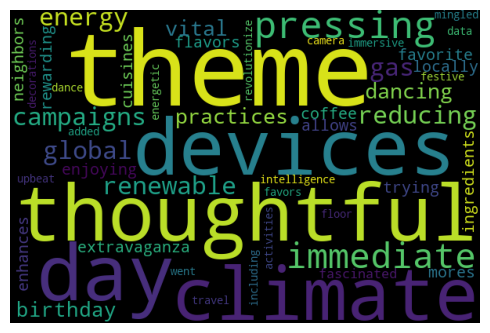

In [79]:
# topic 0
draw_word_cloud(0)

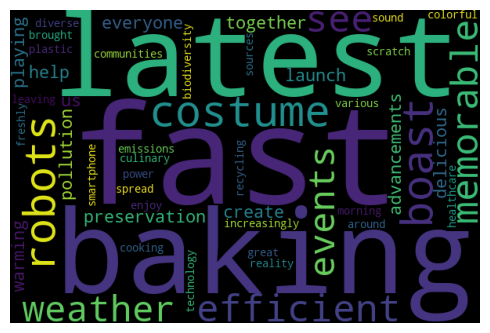

In [80]:
# topic 1
draw_word_cloud(1)  # ...

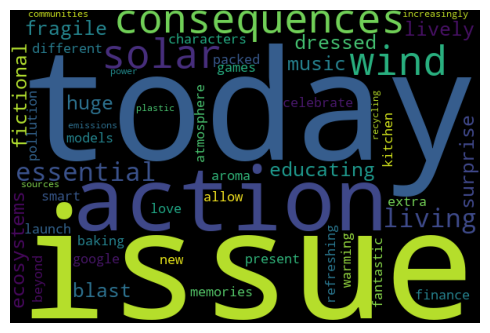

In [81]:
## topic 2
draw_word_cloud(2)